In [ ]:
import os

os.chdir("..")

In [ ]:
# Import relevant libraries
from commons.quiz import *
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style("darkgrid")
warnings.filterwarnings('ignore')

In [ ]:
# Import the data
file_path: str = "datasets/mall_customers.csv"

# Read csv file by using specified 'file_path'
pass

# Drop "CustomerID" from 'data'
pass

# Show first 5 rows
pass

In [ ]:
# Encode 'gender' feature into numerical
pass

### 2 Dimension

In [ ]:
# Specify 2 columns for this topic
data_2d: pd.DataFrame = data[["Annual Income (k$)", "Spending Score (1-100)"]]
data_2d.head()

In [ ]:
from typing import List, Union

# Let's see the distribution for these features
def plot_scatter(
    x: str, 
    y: str, 
    data: pd.DataFrame,
    **kwargs
) -> None:
    """
    Build a scatter plot

    Parameters
    ----------
        x: str
            name of column contained in data, representing x-axis

        y: str
            name of column contained in data, representing y-axis

        data: pd.DataFrame
            specified data

        colors: Union[List[str], pd.Series]
            list of colors
    """
    plt.scatter(x=data[x], y=data[y], **kwargs)
    plt.title(f"{x} vs. {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [ ]:
# Let's visualize by using scatter plot
plot_scatter(x="Annual Income (k$)", y="Spending Score (1-100)", data=data_2d)

**Question 1.** From the figure above, do you have any guess how many clusters it should be?

In [ ]:
# Give your answer
answer = pass

check_answer_1(answer)

Now, let's try to check if the clusters are the same as we expected.

In [ ]:
from sklearn.cluster import KMeans

# Make an instance of clustering model: KMeans
kmeans: KMeans = KMeans(n_clusters=answer)

# Resulting the clusters
clusters: np.ndarray = kmeans.fit_predict(X=data_2d[["Annual Income (k$)", "Spending Score (1-100)"]])

# Add column called 'cluster' to `data_2d`
data_2d["cluster"] = clusters

In [ ]:
# Let's look at visualization, once again, but differ these points by own cluster
plot_scatter(
    x="Annual Income (k$)", 
    y="Spending Score (1-100)", 
    data=data_2d, 
    c=pass, 
    cmap="viridis"
)

**Perfect!** Let's go back into the original data

In [ ]:
# Look at first 5 rows
pass

Well, we know that we can only visualize a graph consisting of 3 features, right? Then, we can choose correct number of clusters based on the graph.

However, **for data with higher dimension, how can we choose optimal number of clusters?**

#### Elbow Method (K-Means)

Source: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
def elbow_method(
    X: pd.DataFrame,
    min_cluster_range: int,
    max_cluster_range: int
) -> None:
    """
    Specify right number of cluster by doing elbow method

    Parameters
    ----------
        X: pd.DataFrame
            specified data

        min_cluster_range: int
            minimum number of probable range of clusters

        max_cluster_range: int
            maximum number of probable range of clusters
    """
    # Within cluster sum of squares
    wcss = []
    for cluster in range(min_cluster_range, max_cluster_range+1):
        kmeans = KMeans(n_clusters=cluster)
        kmeans.fit(X)

        wcss.append(kmeans.inertia_)

    # Plot graph of elbow method
    plt.plot(range(min_cluster_range, max_cluster_range+1), wcss)
    plt.title("Elbow method")
    plt.xlabel("Number of clusters")
    plt.ylabel('WCSS')
    plt.show()

In [ ]:
elbow_method(
    X=pass,
    min_cluster_range=pass,
    max_cluster_range=pass
)

#### Silhouette Analysis (All Clustering Models)

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def silhouette_analysis(
    X: pd.DataFrame,
    col_x: str,
    col_y: str,
    min_cluster_range: int,
    max_cluster_range: int
) -> None:
    """
    Specify right number of cluster by doing silhoutte analysis

    Parameters
    ----------
        X: pd.DataFrame
            specified data

        col_x: str
            column of X, representing x-axis

        col_y: str
            column of X, representing y-axis

        min_cluster_range: int
            minimum number of probable range of clusters

        max_cluster_range: int
            maximum number of probable range of clusters
    """

    range_n_clusters = range(min_cluster_range, max_cluster_range+1)

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[col_x], X[col_y], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        columns = X.columns.tolist()
        dim_x = columns.index(col_x)
        dim_y = columns.index(col_y)
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, dim_x],
            centers[:, dim_y],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[dim_x], c[dim_y], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [ ]:
silhouette_analysis(
    X=pass,
    col_x=pass,
    col_y=pass,
    min_cluster_range=pass,
    max_cluster_range=pass
)

Okay, I understood all of these, but **can we have other methods so we have intuitive insight from the clustering, especially with higher-dimensional data?**

### Dimensionality Reduction

More or less, the idea is just like below:<br><br>
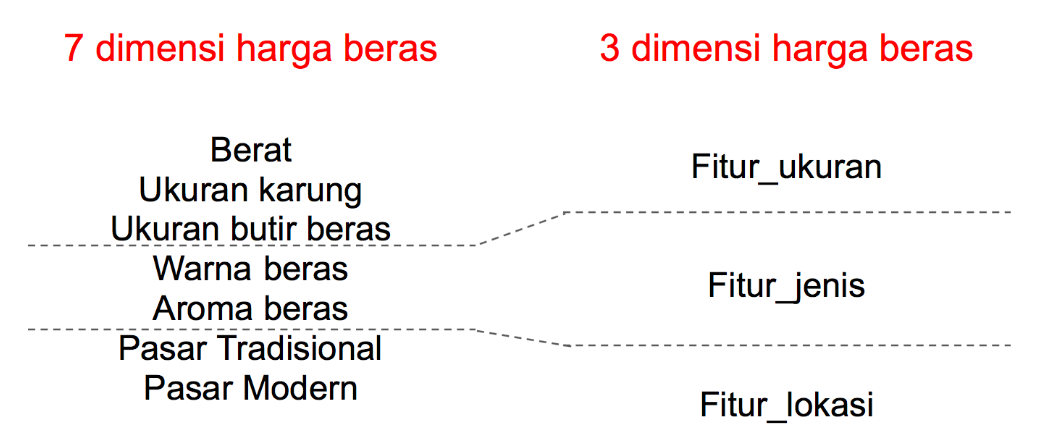

In [ ]:
from sklearn.decomposition import PCA

# Make an instance of PCA
pca = PCA(n_components=2)

# Fit-transform using our-own PCA
data_pca = pca.fit_transform(data)

print(f"Before PCA: {data.shape}")
print(f"After PCA: {data_pca.shape}")

In [ ]:
# Let's visualize the data after applying PCA
data_pca_df: pd.DataFrame = pd.DataFrame(data=data_pca, columns=["pca_1", "pca_2"])

plot_scatter(
    x="pca_1",
    y="pca_2",
    data=data_pca_df,
)

**Question 2.** Based on the scatter plot above, what is optimal number of clusters should we choose?

In [ ]:
# Answer the question with an integer number
answer = pass

check_answer_2(answer)

In [ ]:
# Let's see how many clusters should we choose
elbow_method(
    X=data_pca,
    min_cluster_range=2,
    max_cluster_range=10
)

In [ ]:
# Make an instance of K-Means
kmeans: KMeans = KMeans(n_clusters=answer)
clusters: np.ndarray = kmeans.fit_predict(data_pca_df[["pca_1", "pca_2"]])
data_pca_df["cluster"] = clusters

# Let's visualize it more clearly
plot_scatter(
    x="pca_1",
    y="pca_2",
    data=data_pca_df,
    c=data_pca_df["cluster"],
    cmap="viridis"
)

However, the cost for this technique is **lost of information**.

In [ ]:
# Use other data
X = data_2d.drop("cluster", axis=1)

# Using PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X.values)

# Inverse transform using PCA
X_inv: np.ndarray = pca.inverse_transform(X_pca)

In [ ]:
# Plot the difference of 3 things
plt.figure(figsize=(16, 5))

plt.subplot(131)
plt.scatter(X.values[:, 0], X.values[:, 1], s=20, c='b');
plt.title("$X$", fontsize=14)

plt.subplot(132)
plt.scatter(X_pca, np.zeros_like(X_pca), s=20, c='b');
plt.yticks([])
plt.title("$X_{pca}$", fontsize=14);

plt.subplot(133)
plt.scatter(X_inv[:, 0], X_inv[:, 1], s=20, c='b')
plt.title("$X_{inv}$", fontsize=14);

In [ ]:
# Define x-axis and y-axis
x = [f"PC{i}" for i in range(1, pca.n_components_+1)]
y = pca.explained_variance_ratio_.cumsum()

# Plot Cumulated of Explained Variance
plt.bar(x, y)
plt.xlabel('Principal Components')
plt.ylabel('Cumsum Explained Variance')
plt.title(f"Information Lost: {100 - round(y[-1]*100, 2)}%")
plt.show()

If you need more explanation about this, **let this to be kak Dian's assessment**.

### Congratulations !!

Probably, this is the last question. **How do we know, that number of clusters I define is absolutely correct?**

**Question 3.** Is there any way to know what is the optimal and absolute number of clusters, such as advanced elbow-method?

In [ ]:
# Give your answer by using 'True' or 'False'
answer: Union[str, bool] = pass

check_answer_3(answer)

Before we end this, why don't we compare the result with **DBSCAN**

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Make an instance of DBSCAN
dbscan: DBSCAN = DBSCAN(eps=10, min_samples=5)
dbscan.fit(X=X)

# Add clusters into new column
clustered_dbscan: pd.DataFrame = X.copy()
clustered_dbscan["cluster"] = dbscan.labels_

In [ ]:
# Show 'clustered_dbscan' rows look like
clustered_dbscan

In [ ]:
plot_scatter(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=clustered_dbscan,
    c=clustered_dbscan["cluster"],
    cmap="viridis"
)

The result is not that bad, right? **However, KMeans is still winning over DBSCAN..**